<a href="https://colab.research.google.com/github/AyanBhardwaj06/Ayan_projects/blob/main/CS496_UGP_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS496 UGP 1

*Jiyanshu Dhaka*
*(220481)*

*Ayan Bhardwaj*
*(220257)*


# Integer Linear Programming

to check if given number of red , green ,blue color cell can be arranged to fit within square grid with linear constraints.

R+G+B= (dimension)^2  

we can input custom linear constraints of form aR + bG + cB <= d.


from wikipedia, ILP cannonical form is :

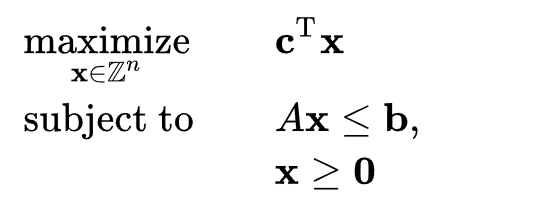

so, we use integer linear programming to check if it is possible to satisfy the constraint.

In [ ]:
from scipy.optimize import linprog

def can_fit_colors():
    """
    Check if the given [R, G, B] can fit into a square grid with constraints.

    Returns:
        str: 'YES' if the configuration is possible, otherwise 'NO'.
    """
    # Take inputs for the grid size and color counts
    grid_size = int(input("Enter the dimension of the square grid: "))
    R, G, B = map(int, input("Enter the counts of R, G, B (space-separated): ").replace(',', ' ').split())

    total_cells = grid_size ** 2

    # Ensure the total matches the grid size
    if R + G + B != total_cells:
        return "NO: The sum of R, G, and B does not equal the total grid cells."

    print("Define constraints:")
    print("1. Total cells constraint: R + G + B must equal total_cells.")
    print("2. Custom constraints must be of the form 'a b c d' for aR + bG + cB <= d.")

    custom_constraints = input("Do you want to add custom constraints? (yes/no): ").strip().lower()

    # Prepare the objective function (dummy since we're only checking feasibility)
    c = [0, 0, 0]  # Coefficients for R, G, B

    # Inequality constraints (Ax <= b)
    A_ub = []
    b_ub = []

    if custom_constraints == "yes":
        while True:
            constraint = input("Enter a custom constraint as 'a b c d' (or 'done' to finish): ").strip()
            if constraint.lower() == "done":
                break
            try:
                a, b, c_value, d = map(int, constraint.split())
                # Store coefficients in the correct order for the inequality
                A_ub.append([a, b, c_value])
                b_ub.append(d)
            except Exception as e:
                print(f"Error in constraint: {e}. Please enter in 'a b c d' format.")

    # Convert lists to numpy arrays if they're not empty
    A_ub = A_ub if A_ub else []  # Use an empty list if no constraints
    b_ub = b_ub if b_ub else []  # Use an empty list if no constraints

    # Variable bounds for R, G, B
    bounds = [(0, R), (0, G), (0, B)]

    # Equality constraint for total cells
    A_eq = [[1, 1, 1]]  # R + G + B = total_cells
    b_eq = [total_cells]

    try:
        # Solve the linear programming problem
        res = linprog(c, A_ub=A_ub, b_ub=b_ub, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method='highs')

        # Check if a feasible solution exists
        if res.success:
            return "YES"
        else:
            return "NO"
    except Exception as e:
        return f"An error occurred during linear programming: {e}"

# Example usage
if __name__ == "__main__":
    result = can_fit_colors()
    print(result)

Enter the dimension of the square grid: 10
Enter the counts of R, G, B (space-separated): 20 20 60
Define constraints:
1. Total cells constraint: R + G + B must equal total_cells.
2. Custom constraints must be of the form 'a b c d' for aR + bG + cB <= d.
Do you want to add custom constraints? (yes/no): yes
Enter a custom constraint as 'a b c d' (or 'done' to finish): 1 1 1 2000
Enter a custom constraint as 'a b c d' (or 'done' to finish): 3 4 5 100
Enter a custom constraint as 'a b c d' (or 'done' to finish): 3 3  3 1000
Enter a custom constraint as 'a b c d' (or 'done' to finish): done
NO


Now if constarint are not linear.

# Periphery constraint

if one colour does not have to be on periphery then it should satisfy:

R < = dimension*dimension - 4 * dimension + 4

if it has to be only on pheriphery then

R < = 4* dimension - 4

In [ ]:
def fill_grid(dimension, red, green, blue, periphery_colors):
    grid = [[None] * dimension for _ in range(dimension)]
    color_counts = {'R': red, 'G': green, 'B': blue}

    # Define periphery positions
    periphery_positions = [(0, j) for j in range(dimension)] + [(dimension - 1, j) for j in range(dimension)] + \
                          [(i, 0) for i in range(1, dimension - 1)] + [(i, dimension - 1) for i in range(1, dimension - 1)]

    # Assign periphery colors
    index = 0
    for i, j in periphery_positions:
        if index < len(periphery_colors) and color_counts[periphery_colors[index]] > 0:
            grid[i][j] = periphery_colors[index]
            color_counts[periphery_colors[index]] -= 1
            index += 1
        else:
            # If selected periphery colors run out, use any available color
            for color in 'RGB':
                if color_counts[color] > 0:
                    grid[i][j] = color
                    color_counts[color] -= 1
                    break

    # Fill the rest of the grid with available colors
    for i in range(dimension):
        for j in range(dimension):
            if grid[i][j] is None:
                for color in 'RGB':
                    if color_counts[color] > 0:
                        grid[i][j] = color
                        color_counts[color] -= 1
                        break

    return grid

# Example usage
dimension = int(input("Enter the dimension: "))
red = int(input("Enter the number of red tiles: "))
green = int(input("Enter the number of green tiles: "))
blue = int(input("Enter the number of blue tiles: "))
periphery_colors = input("Enter the colors for the periphery in order (R/G/B, e.g., R B G): ").strip().upper().split()

grid = fill_grid(dimension, red, green, blue, periphery_colors)

for row in grid:
    print(" ".join(row))


Enter the dimension: 7
Enter the number of red tiles: 15
Enter the number of green tiles: 3
Enter the number of blue tiles: 31
Enter the colors for the periphery in order (R/G/B, e.g., R B G): R G
R G R R R R R
R B B B B B B
R B B B B B B
G B B B B B B
G B B B B B B
B B B B B B B
R R R R R R R


# Diagonal Constraint:

if Red has to be only on daigonal then

R <= dimension

if Red cannot be on daigonal then

R <= dimension * dimension - dimension

In [ ]:
 def fill_grid(dimension, red, green, blue, diagonal_colors):
    grid = [[None] * dimension for _ in range(dimension)]
    color_counts = {'R': red, 'G': green, 'B': blue}
    diagonal_positions = [(i, i) for i in range(dimension)]

    # Assign diagonal colors
    index = 0
    for i, j in diagonal_positions:
        if index < len(diagonal_colors) and color_counts[diagonal_colors[index]] > 0:
            grid[i][j] = diagonal_colors[index]
            color_counts[diagonal_colors[index]] -= 1
            index += 1
        else:
            # If selected diagonal colors run out, use any available color
            for color in 'RGB':
                if color_counts[color] > 0:
                    grid[i][j] = color
                    color_counts[color] -= 1
                    break

    # Fill the rest of the grid with available colors
    for i in range(dimension):
        for j in range(dimension):
            if grid[i][j] is None:
                for color in 'RGB':
                    if color_counts[color] > 0:
                        grid[i][j] = color
                        color_counts[color] -= 1
                        break

    return grid

# Example usage
dimension = int(input("Enter the dimension: "))
red = int(input("Enter the number of red tiles: "))
green = int(input("Enter the number of green tiles: "))
blue = int(input("Enter the number of blue tiles: "))
diagonal_colors = input("Enter the colors for the diagonal in order (R/G/B, e.g., R G B): ").strip().upper().split()

grid = fill_grid(dimension, red, green, blue, diagonal_colors)

for row in grid:
    print(" ".join(row))


Enter the dimension: 8
Enter the number of red tiles: 2
Enter the number of green tiles: 4
Enter the number of blue tiles: 58
Enter the colors for the diagonal in order (R/G/B, e.g., R G B): R G
R B B B B B B B
B G B B B B B B
B B R B B B B B
B B B G B B B B
B B B B G B B B
B B B B B G B B
B B B B B B B B
B B B B B B B B


# **Adjacency Constraint:**
for R and G to be adjacent in grid: grid layout can be graph.

cells are nodes and adjacent cells share an edge.

let we define binary variable s.t. R[x]=0 if x cell does not contain red, else 1.


for each cell (i, j) in the grid:

If there is a red cell x[i, j]^R at position (i, j), then at least one of its adjacent cells must be green, represented as:
  - x[i, j+1]^G (right)
  - x[i, j-1]^G (left)
  - x[i-1, j]^G (above)
  - x[i+1, j]^G (below)

if x[i, j]^R ==1, then:  
x[i, j+1]^G + x[i, j-1]^G + x[i-1, j]^G + x[i+1, j]^G >= 1  

so wherever R is in a cell then atleast 1 G is near it and similarly if x[i, j]^G ==1, then:  
x[i, j+1]^R + x[i, j-1]^R + x[i-1, j]^R + x[i+1, j]^R >= 1  

so wherever G is in a cell then atleast 1 R is near it.



In [ ]:
import random

def get_user_input():
    n = int(input("Enter number of rows: "))
    m = int(input("Enter number of columns: "))
    total_cells = n * m

    tile_counts = {}
    tile_counts['R'] = int(input("Enter count of R: "))
    tile_counts['G'] = int(input("Enter count of G: "))
    tile_counts['B'] = int(input("Enter count of B: "))

    if sum(tile_counts.values()) != total_cells:
        print("Error: The sum of R, G, B must equal grid area.")
        return None, None, None

    adjacent_tiles = input("Enter two tiles for constraint (e.g., R G): ").split()
    if len(adjacent_tiles) != 2 or adjacent_tiles[0] not in tile_counts or adjacent_tiles[1] not in tile_counts or adjacent_tiles[0] == adjacent_tiles[1]:
        print("Error: Invalid tile constraint selection.")
        return None, None, None

    return n, m, tile_counts, adjacent_tiles

def generate_strategic_grid(n, m, tile_counts, adjacent_tiles):
    grid = [[' ' for _ in range(m)] for _ in range(n)]

    tile1, tile2 = adjacent_tiles[0], adjacent_tiles[1]
    if tile_counts[tile1] > tile_counts[tile2]:
        tile1, tile2 = tile2, tile1

    if tile_counts[tile2] > 4 * tile_counts[tile1]:
        print("Error: Not possible to satisfy the constraint.")
        return None, None, None

    placed_tiles = {'R': 0, 'G': 0, 'B': 0}
    adjacent_pairs = 0
    placed_positions = []

    row, col = 1, 1
    while placed_tiles[tile1] < tile_counts[tile1] and placed_tiles[tile2] < tile_counts[tile2]:
        if grid[row][col] == ' ':
            grid[row][col] = tile1
            placed_tiles[tile1] += 1
            placed_positions.append((row, col))

            adjacent_positions = [
                (row, col-1), (row, col+1),
                (row-1, col), (row+1, col)
            ]

            for adj_row, adj_col in adjacent_positions:
                if (0 <= adj_row < n and 0 <= adj_col < m and
                    grid[adj_row][adj_col] == ' ' and
                    placed_tiles[tile2] < tile_counts[tile2]):
                    grid[adj_row][adj_col] = tile2
                    placed_tiles[tile2] += 1
                    adjacent_pairs += 1

        col += 3
        if col >= m:
            col = 1
            row += 3
            if row >= n:
                break

    if placed_tiles[tile1] < tile_counts[tile1]:
        for i, j in placed_positions:
            diagonal_positions = [
                (i-1, j-1), (i-1, j+1),
                (i+1, j-1), (i+1, j+1)
            ]
            for di, dj in diagonal_positions:
                if (0 <= di < n and 0 <= dj < m and grid[di][dj] == ' ' and placed_tiles[tile1] < tile_counts[tile1]):
                    grid[di][dj] = tile1
                    placed_tiles[tile1] += 1
                    if placed_tiles[tile1] == tile_counts[tile1]:
                        break
            if placed_tiles[tile1] == tile_counts[tile1]:
                break

    if placed_tiles[tile2] < tile_counts[tile2]:
        for i, j in placed_positions:
            diagonal_positions = [
                (i-1, j-1), (i-1, j+1),
                (i+1, j-1), (i+1, j+1)
            ]
            for di, dj in diagonal_positions:
                if (0 <= di < n and 0 <= dj < m and grid[di][dj] == ' ' and placed_tiles[tile2] < tile_counts[tile2]):
                    grid[di][dj] = tile2
                    placed_tiles[tile2] += 1
                    if placed_tiles[tile2] == tile_counts[tile2]:
                        break
            if placed_tiles[tile2] == tile_counts[tile2]:
                break

    remaining_tiles = []
    for tile, count in tile_counts.items():
        remaining = count - placed_tiles[tile]
        remaining_tiles.extend([tile] * remaining)
    random.shuffle(remaining_tiles)

    for i in range(n):
        for j in range(m):
            if grid[i][j] == ' ' and remaining_tiles:
                grid[i][j] = remaining_tiles.pop()
                placed_tiles[grid[i][j]] += 1

    return grid, placed_tiles, adjacent_pairs

if __name__ == "__main__":
    n, m, tile_counts, adjacent_tiles = get_user_input()
    if n and m:
        grid, placed_tiles, adjacent_pairs = generate_strategic_grid(n, m, tile_counts, adjacent_tiles)
        if grid:
            for row in grid:
                print(" ".join(row))



# **No two adjacent tiles can have the same color.**

 Method:

 Start filling the grid from the top-left corner (0,0).
Try placing a color while checking if the rules are followed.
If a conflict occurs, undo the last step (backtrack) and try a different color.
Move to the next cell and repeat until the grid is completely filled.

R+G+B=n×m

C(i,j)
=C(i+1,j)
 and C(i,j)
 =C(i,j+1)

In [ ]:
import random

def is_valid(grid, row, col, color, n, m):
    """Checks if placing the given color at (row, col) is valid."""
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Up, Down, Left, Right

    for dr, dc in directions:
        r, c = row + dr, col + dc
        if 0 <= r < n and 0 <= c < m and grid[r][c] == color:
            return False  # Adjacent tile has the same color

    return True

def solve(grid, row, col, color_counts, n, m):
    """Recursively fills the grid ensuring no two adjacent tiles have the same color."""
    if row == n:
        return True  # Successfully filled the entire grid

    next_row, next_col = (row, col + 1) if col + 1 < m else (row + 1, 0)

    for color in ['R', 'G', 'B']:
        if color_counts[color] > 0 and is_valid(grid, row, col, color, n, m):
            grid[row][col] = color  # Place color
            color_counts[color] -= 1

            if solve(grid, next_row, next_col, color_counts, n, m):
                return True  # If valid solution found, return True

            grid[row][col] = None  # Backtrack
            color_counts[color] += 1

    return False  # No valid color found

def generate_colored_grid(n, m, red_count, green_count, blue_count):
    """Generates a valid n x m grid with no two adjacent tiles having the same color."""
    total_tiles = n * m
    if red_count + green_count + blue_count != total_tiles:
        print("Invalid input: Total number of tiles does not match grid size!")
        return None

    grid = [[None for _ in range(m)] for _ in range(n)]
    color_counts = {'R': red_count, 'G': green_count, 'B': blue_count}

    if not solve(grid, 0, 0, color_counts, n, m):
        print("No valid grid configuration found!")
        return None

    return grid

def print_grid(grid):
    """Prints the grid in a readable format."""
    for row in grid:
        print(" ".join(row))

# User Input
n = int(input("Enter the number of rows: "))
m = int(input("Enter the number of columns: "))
red_count = int(input("Enter the number of Red tiles: "))
green_count = int(input("Enter the number of Green tiles: "))
blue_count = int(input("Enter the number of Blue tiles: "))

# Generate and print the grid
grid = generate_colored_grid(n, m, red_count, green_count, blue_count)

if grid:
    print("\nGenerated Grid:")
    print_grid(grid)


Enter the number of rows: 5
Enter the number of columns: 5
Enter the number of Red tiles: 20
Enter the number of Green tiles: 2
Enter the number of Blue tiles: 3
No valid grid configuration found!


✔ No adjacency constraint – adjacent tiles can have the same color.

✔ User-defined block size – block_size × block_size (e.g., 3×3, 4×4).

✔ User-defined block color – only the selected color forms these blocks.

✔ User-defined tile counts – ensures correct distribution.

✔ Handles cases where blocks can't be placed – prints a warning.
# **Big Coloured Block Constraint**
 **Method:**
 R+G+B=n×m

 Choose a colour, Let us say blue

 Chose the dimensions of the block and number of blocks.

 Check if the possible arrangement is possible

 N* (S*S) <= B

 Tries 100 times per block to find space in the grid.

In [ ]:
import random

def place_blocks(grid, block_color, block_size, block_count, n, m, color_counts):
    """Places the required number of block_size × block_size blocks of a specific color in the grid."""
    required_tiles = block_count * (block_size ** 2)

    # Ensure we have enough tiles of the block color
    if required_tiles > color_counts[block_color]:
        print(f"Error: Not enough {block_color} tiles to form {block_count} blocks of size {block_size}×{block_size}.")
        return False  # Return False to indicate failure

    placed_blocks = 0
    for _ in range(block_count):
        found = False
        for _ in range(100):  # Try 100 random placements
            row = random.randint(0, n - block_size)
            col = random.randint(0, m - block_size)

            # Check if the block_size × block_size area is free
            if all(grid[r][c] is None for r in range(row, row + block_size) for c in range(col, col + block_size)):
                # Place the block
                for r in range(row, row + block_size):
                    for c in range(col, col + block_size):
                        grid[r][c] = block_color

                placed_blocks += 1
                color_counts[block_color] -= (block_size ** 2)  # Reduce available tiles
                found = True
                break  # Move to next block

        if not found:
            print(f"Warning: Could not place all {block_count} blocks.")
            return False  # Return False to indicate failure

    return True  # Blocks placed successfully

def fill_remaining_tiles(grid, color_counts, n, m):
    """Fills the remaining tiles randomly while ensuring total tile counts are met."""
    available_positions = [(r, c) for r in range(n) for c in range(m) if grid[r][c] is None]
    random.shuffle(available_positions)

    for color in ['R', 'G', 'B']:
        for _ in range(color_counts[color]):
            if available_positions:
                row, col = available_positions.pop()
                grid[row][col] = color

def generate_colored_grid(n, m, red_count, green_count, blue_count, block_color, block_size, block_count):
    """Generates a valid n × m grid with block_size × block_size blocks and fills remaining spaces randomly."""
    total_tiles = n * m
    if red_count + green_count + blue_count != total_tiles:
        print("Error: The total number of tiles must be equal to n × m.")
        return None  # Return None instead of exiting

    grid = [[None for _ in range(m)] for _ in range(n)]
    color_counts = {'R': red_count, 'G': green_count, 'B': blue_count}

    # Place blocks first
    if not place_blocks(grid, block_color, block_size, block_count, n, m, color_counts):
        return None  # Return None instead of exiting

    # Fill the rest randomly
    fill_remaining_tiles(grid, color_counts, n, m)

    return grid

def print_grid(grid):
    """Prints the grid in a readable format."""
    for row in grid:
        print(" ".join(row))

# User Input
n = int(input("Enter the number of rows: "))
m = int(input("Enter the number of columns: "))
red_count = int(input("Enter the number of Red tiles: "))
green_count = int(input("Enter the number of Green tiles: "))
blue_count = int(input("Enter the number of Blue tiles: "))

# **Exit immediately if the total number of tiles is incorrect**
if red_count + green_count + blue_count != n * m:
    print("Error: The total number of tiles must be equal to n × m.")
    exit()

block_color = input("Enter the color (R, G, B) for the blocks: ").strip().upper()
block_size = int(input("Enter the block size (e.g., 3 for 3×3 blocks): "))
block_count = int(input(f"Enter the number of {block_size}×{block_size} blocks for {block_color}: "))

# Generate and print the grid
grid = generate_colored_grid(n, m, red_count, green_count, blue_count, block_color, block_size, block_count)

if grid:
    print("\nGenerated Grid:")
    print_grid(grid)


Enter the number of rows: 10
Enter the number of columns: 10
Enter the number of Red tiles: 25
Enter the number of Green tiles: 30
Enter the number of Blue tiles: 45
Enter the color (R, G, B) for the blocks: B
Enter the block size (e.g., 3 for 3×3 blocks): 5
Enter the number of 5×5 blocks for B: 1

Generated Grid:
R R R G B G G B G G
B B B B B R R R B B
B B B B B R B R R G
B B B B B G B G B B
B B B B B R R G B B
B B B B B B G G B G
G B G G G G R B R B
G G R R R R G G R B
G G G R B G R G B R
G G B B G R R G R R


# **Pattern constraint**


In [ ]:
import random
import sys

def max_patterns(X, Y, Z, pattern):
    """Calculates the maximum number of patterns that can be formed based on available tiles."""
    # Count occurrences of R, G, B in the given pattern
    x = pattern.count('R')
    y = pattern.count('G')
    z = pattern.count('B')

    # Prevent division by zero (if color is absent in the pattern, set its count high)
    x = X // x if x > 0 else float('inf')
    y = Y // y if y > 0 else float('inf')
    z = Z // z if z > 0 else float('inf')

    # Compute max number of patterns that can be placed
    return min(x, y, z)

def fill_with_patterns(grid, pattern, pattern_length, color_counts, n, m, max_patterns):
    """Fills the grid row-wise using the user-specified pattern while ensuring tile counts are not exceeded."""
    row, applied_patterns = 0, 0

    while applied_patterns < max_patterns and row < n:
        for start_col in range(0, m, pattern_length):
            end_col = start_col + pattern_length

            # Ensure pattern fits within row
            if end_col > m:
                break  # Skip to next row

            pattern_slice = list(pattern[:end_col - start_col])

            # Check if we have enough tiles to place this pattern
            if all(color_counts[color] >= pattern_slice.count(color) for color in pattern_slice):
                grid[row][start_col:end_col] = pattern_slice
                for color in pattern_slice:
                    color_counts[color] -= 1  # Deduct used colors
                applied_patterns += 1  # Increment count of applied patterns

            if applied_patterns >= max_patterns:
                return  # Stop placing patterns once we reach max count

        # Always move to the next row
        row += 1

def fill_remaining(grid, color_counts, n, m):
    """Fills remaining empty cells randomly but ensuring total tile counts match exactly."""
    available_tiles = [color for color, count in color_counts.items() for _ in range(count)]
    random.shuffle(available_tiles)
    tile_index = 0

    for row in range(n):
        for col in range(m):
            if grid[row][col] is None and tile_index < len(available_tiles):
                grid[row][col] = available_tiles[tile_index]
                tile_index += 1

def generate_colored_grid(n, m, red_count, green_count, blue_count, pattern, pattern_length):
    """Generates an n × m grid using the specified tile pattern and fills remaining spaces randomly."""
    total_tiles = n * m
    given_tiles = red_count + green_count + blue_count

    if given_tiles != total_tiles:
        print("\n❌ Invalid Configuration: The total number of tiles does not match the grid size!")
        sys.exit(1)

    if pattern_length > m:
        print("\n❌ This configuration cannot be possible! The pattern length exceeds the number of columns.")
        sys.exit(1)

    if len(pattern) != pattern_length:
        print("\n❌ Invalid Pattern: The specified pattern length does not match the given pattern!")
        sys.exit(1)

    # Calculate max patterns that can be formed
    max_patterns_count = max_patterns(red_count, green_count, blue_count, pattern)
    print(f"\n✅ Maximum number of patterns that can be formed: {max_patterns_count}")  # Print before grid generation
    if(max_patterns_count==0):
       print("\n❌ This configuration cannot be possible!")
       sys.exit(1)
    grid = [[None for _ in range(m)] for _ in range(n)]
    color_counts = {'R': red_count, 'G': green_count, 'B': blue_count}

    fill_with_patterns(grid, pattern, pattern_length, color_counts, n, m, max_patterns_count)
    fill_remaining(grid, color_counts, n, m)

    return grid

def print_grid(grid):
    """Prints the grid in a readable format."""
    for row in grid:
        print(" ".join(row))

# User Input
n = int(input("Enter the number of rows: "))
m = int(input("Enter the number of columns: "))
red_count = int(input("Enter the number of Red tiles: "))
green_count = int(input("Enter the number of Green tiles: "))
blue_count = int(input("Enter the number of Blue tiles: "))

total_tiles = n * m
given_tiles = red_count + green_count + blue_count

if given_tiles != total_tiles:
    print("\n❌ Invalid Configuration: The total number of tiles does not match the grid size!")
    sys.exit(1)

pattern_length = int(input("Enter the number of tiles for the pattern: "))
pattern = input(f"Enter the pattern of {pattern_length} tiles (e.g., RRGB): ").strip().upper()

if pattern_length > m:
    print("\n❌ This configuration cannot be possible! The pattern length exceeds the number of columns.")
    sys.exit(1)

if len(pattern) != pattern_length:
    print("\n❌ Invalid Pattern: The specified pattern length does not match the given pattern!")
    sys.exit(1)

# Calculate and print the maximum number of patterns before generating the grid
max_patterns_count = max_patterns(red_count, green_count, blue_count, pattern)
grid = generate_colored_grid(n, m, red_count, green_count, blue_count, pattern, pattern_length)

if grid:
    print("\n✅ Generated Grid:")
    print_grid(grid)


Enter the number of rows: 5
Enter the number of columns: 5
Enter the number of Red tiles: 5
Enter the number of Green tiles: 10
Enter the number of Blue tiles: 10
Enter the number of tiles for the pattern: 3
Enter the pattern of 3 tiles (e.g., RRGB): RRG

✅ Maximum number of patterns that can be formed: 2

✅ Generated Grid:
R R G G G
R R G G G
B G G B R
B B B B B
G G B B B


# Weighted Positional Constraint

In [ ]:
import numpy as np

def get_int_input(prompt):
    while True:
        try:
            value = int(input(prompt))
            return value
        except ValueError:
            print("Invalid input. Please enter an integer.")

def get_float_input(prompt):
    while True:
        try:
            value = float(input(prompt))
            return value
        except ValueError:
            print("Invalid input. Please enter a float.")

def validate_weights(w1, w2, w3, w4, w5=None, w6=None, w7=None, w8=None, w9=None):
    total = w1 + w2 + w3 + w4
    if w5 is not None:
        total += w5
    if w6 is not None:
        total += w6
    if w7 is not None:
        total += w7
    if w8 is not None:
        total += w8
    if w9 is not None:
        total += w9
    return abs(total - 1.0) < 1e-6

def calculate_score_matrix(grid, red_weights, green_weights, blue_weights, odd_row=False, odd_col=False,
                            red_axis_weights=None, green_axis_weights=None, blue_axis_weights=None):
    rows, cols = grid.shape
    mid_row = rows // 2
    mid_col = cols // 2
    score_matrix = np.zeros_like(grid, dtype=float)

    for i in range(rows):
        for j in range(cols):
            # Quadrant Weights
            if i < mid_row and j < mid_col:  # Upper Left
                if grid[i, j] == 1: score_matrix[i, j] = red_weights[0]
                elif grid[i, j] == 2: score_matrix[i, j] = green_weights[0]
                elif grid[i, j] == 3: score_matrix[i, j] = blue_weights[0]
            elif i < mid_row and j >= mid_col:  # Upper Right
                if grid[i, j] == 1: score_matrix[i, j] = red_weights[1]
                elif grid[i, j] == 2: score_matrix[i, j] = green_weights[1]
                elif grid[i, j] == 3: score_matrix[i, j] = blue_weights[1]
            elif i >= mid_row and j < mid_col:  # Lower Left
                if grid[i, j] == 1: score_matrix[i, j] = red_weights[2]
                elif grid[i, j] == 2: score_matrix[i, j] = green_weights[2]
                elif grid[i, j] == 3: score_matrix[i, j] = blue_weights[2]
            else:  # Lower Right
                if grid[i, j] == 1: score_matrix[i, j] = red_weights[3]
                elif grid[i, j] == 2: score_matrix[i, j] = green_weights[3]
                elif grid[i, j] == 3: score_matrix[i, j] = blue_weights[3]

            # Axis and Origin Weights (if odd dimensions)
            if odd_row and i == mid_row:
                if grid[i, j] == 1:
                    if j < mid_col: score_matrix[i, j] = red_axis_weights[0]  # -x
                    elif j > mid_col: score_matrix[i, j] = red_axis_weights[1]  # +x
                    else: score_matrix[i, j] = red_axis_weights[4]  # Origin
                elif grid[i, j] == 2:
                    if j < mid_col: score_matrix[i, j] = green_axis_weights[0]
                    elif j > mid_col: score_matrix[i, j] = green_axis_weights[1]
                    else: score_matrix[i, j] = green_axis_weights[4]
                elif grid[i, j] == 3:
                    if j < mid_col: score_matrix[i, j] = blue_axis_weights[0]
                    elif j > mid_col: score_matrix[i, j] = blue_axis_weights[1]
                    else: score_matrix[i, j] = blue_axis_weights[4]
            if odd_col and j == mid_col:
                if grid[i, j] == 1:
                    if i < mid_row: score_matrix[i, j] = red_axis_weights[2]  # +y
                    elif i > mid_row: score_matrix[i, j] = red_axis_weights[3]  # -y
                    else: score_matrix[i, j] = red_axis_weights[4]  # Origin
                elif grid[i, j] == 2:
                    if i < mid_row: score_matrix[i, j] = green_axis_weights[2]
                    elif i > mid_row: score_matrix[i, j] = green_axis_weights[3]
                    else: score_matrix[i, j] = green_axis_weights[4]
                elif grid[i, j] == 3:
                    if i < mid_row: score_matrix[i, j] = blue_axis_weights[2]
                    elif i > mid_row: score_matrix[i, j] = blue_axis_weights[3]
                    else: score_matrix[i, j] = blue_axis_weights[4]

    return score_matrix

def calculate_score(score_matrix):
    return np.sum(score_matrix)

def solve_grid_coloring():
    # 1. Input Grid Dimensions and Color Counts
    rows = get_int_input("Enter the number of rows: ")
    cols = get_int_input("Enter the number of columns: ")
    grid_area = rows * cols

    num_red = get_int_input("Enter the number of red cells: ")
    num_green = get_int_input("Enter the number of green cells: ")
    num_blue = get_int_input("Enter the number of blue cells: ")

    if num_red + num_green + num_blue != grid_area:
        print("Error: The sum of R, G, B cells must equal the grid area.")
        return

    # 2. Input Quadrant Weights
    def get_color_weights(color_name):
        while True:
            print(f"Enter the quadrant weights for {color_name}:")
            w1 = get_float_input(f"Weight of {color_name} in Upper Left: ")
            w2 = get_float_input(f"Weight of {color_name} in Upper Right: ")
            w3 = get_float_input(f"Weight of {color_name} in Lower Left: ")
            w4 = get_float_input(f"Weight of {color_name} in Lower Right: ")

            if validate_weights(w1, w2, w3, w4):
                return [w1, w2, w3, w4]
            else:
                print("Error: Quadrant weights must sum to 1. Please re-enter.")

    red_weights = get_color_weights("Red")
    green_weights = get_color_weights("Green")
    blue_weights = get_color_weights("Blue")

    # 3. Input Axis and Origin Weights (if odd dimensions)
    odd_row = rows % 2 != 0
    odd_col = cols % 2 != 0
    red_axis_weights, green_axis_weights, blue_axis_weights = None, None, None

    def get_axis_weights(color_name):
        while True:
            print(f"Enter the axis and origin weights for {color_name}:")
            w_neg_x = get_float_input(f"Weight of {color_name} on -x axis: ") if odd_row else 0
            w_pos_x = get_float_input(f"Weight of {color_name} on +x axis: ") if odd_row else 0
            w_pos_y = get_float_input(f"Weight of {color_name} on +y axis: ") if odd_col else 0
            w_neg_y = get_float_input(f"Weight of {color_name} on -y axis: ") if odd_col else 0
            w_origin = get_float_input(f"Weight of {color_name} at origin: ") if odd_row or odd_col else 0

            if validate_weights(0 if not odd_row else w_neg_x, 0 if not odd_row else w_pos_x,
                                0 if not odd_col else w_pos_y, 0 if not odd_col else w_neg_y, w_origin):
                return [w_neg_x, w_pos_x, w_pos_y, w_neg_y, w_origin]
            else:
                print("Error: Axis and origin weights must sum to 1. Please re-enter.")

    if odd_row or odd_col:
        red_axis_weights = get_axis_weights("Red")
        green_axis_weights = get_axis_weights("Green")
        blue_axis_weights = get_axis_weights("Blue")

    # 4. Initialize Variables
    max_score = float('-inf')
    best_grid = None
    best_score_matrix = None
    total_iterations = 1000  # You can adjust this

    # 5. Iterative Placement and Scoring
    for iteration in range(total_iterations):
        # a. Create a random grid
        grid = np.zeros((rows, cols), dtype=int)
        cells = [(i, j) for i in range(rows) for j in range(cols)]
        np.random.shuffle(cells)  # Shuffle to place colors randomly

        # Assign colors
        for i in range(num_red):
            grid[cells[i]] = 1  # Red
        for i in range(num_red, num_red + num_green):
            grid[cells[i]] = 2  # Green
        for i in range(num_red + num_green, grid_area):
            grid[cells[i]] = 3  # Blue

        # b. Calculate the score and score matrix
        score_matrix = calculate_score_matrix(grid, red_weights, green_weights, blue_weights, odd_row, odd_col,
                                               red_axis_weights, green_axis_weights, blue_axis_weights)
        score = calculate_score(score_matrix)

        # c. Update max score if necessary
        if score > max_score:
            max_score = score
            best_grid = grid.copy()  # Important: copy the grid
            best_score_matrix = score_matrix.copy()

    # 6. Print the Results
    print("\nMaximum Optimal Score:", max_score)

    # Convert grid to R, G, B
    rgb_grid = np.empty(best_grid.shape, dtype=str)
    rgb_grid[best_grid == 1] = 'R'
    rgb_grid[best_grid == 2] = 'G'
    rgb_grid[best_grid == 3] = 'B'

    print("Best Grid Configuration (R=Red, G=Green, B=Blue):\n", rgb_grid)
    print("Maximum Optimal Weight Matrix:\n", best_score_matrix)

# Run the solver
solve_grid_coloring()

Enter the number of rows: 8
Enter the number of columns: 8
Enter the number of red cells: 30
Enter the number of green cells: 24
Enter the number of blue cells: 10
Enter the quadrant weights for Red:
Weight of Red in Upper Left: 0.3
Weight of Red in Upper Right: 0.2
Weight of Red in Lower Left: 0.2
Weight of Red in Lower Right: 0.3
Enter the quadrant weights for Green:
Weight of Green in Upper Left: 0.5
Weight of Green in Upper Right: 0.1
Weight of Green in Lower Left: 0.2
Weight of Green in Lower Right: 0.3
Error: Quadrant weights must sum to 1. Please re-enter.
Enter the quadrant weights for Green:
Weight of Green in Upper Left: 0.5
Weight of Green in Upper Right: 0.3
Weight of Green in Lower Left: 0.1
Weight of Green in Lower Right: 0.1
Enter the quadrant weights for Blue:
Weight of Blue in Upper Left: 0.6
Weight of Blue in Upper Right: 0.2
Weight of Blue in Lower Left: 0.1
Weight of Blue in Lower Right: 0.1

Maximum Optimal Score: 18.5
Best Grid Configuration (R=Red, G=Green, B=Blu

In [ ]:
pip install PySimpleGUI

In [ ]:
pip install gradio

In [ ]:
import numpy as np
import gradio as gr
import random

def validate_weights(w1, w2, w3, w4, w5=None, w6=None, w7=None, w8=None, w9=None):
    total = w1 + w2 + w3 + w4
    if w5 is not None:
        total += w5
    if w6 is not None:
        total += w6
    if w7 is not None:
        total += w7
    if w8 is not None:
        total += w8
    if w9 is not None:
        total += w9
    return abs(total - 1.0) < 1e-6

def validate_neighbor_weights(rg, rb, gb):
    return abs(rg + rb + gb - 1.0) < 1e-6

def calculate_score_matrix(grid, red_weights, green_weights, blue_weights,
                            odd_row=False, odd_col=False,
                            red_axis_weights=None, green_axis_weights=None,
                            blue_axis_weights=None,
                            neighbor_rg=0, neighbor_rb=0, neighbor_gb=0):  # Added neighbor weights
    rows, cols = grid.shape
    mid_row = rows // 2
    mid_col = cols // 2
    score_matrix = np.zeros_like(grid, dtype=float)

    for i in range(rows):
        for j in range(cols):
            # Quadrant Weights
            if i < mid_row and j < mid_col:  # Upper Left
                if grid[i, j] == 1: score_matrix[i, j] = red_weights[0]
                elif grid[i, j] == 2: score_matrix[i, j] = green_weights[0]
                elif grid[i, j] == 3: score_matrix[i, j] = blue_weights[0]
            elif i < mid_row and j >= mid_col:  # Upper Right
                if grid[i, j] == 1: score_matrix[i, j] = red_weights[1]
                elif grid[i, j] == 2: score_matrix[i, j] = green_weights[1]
                elif grid[i, j] == 3: score_matrix[i, j] = blue_weights[1]
            elif i >= mid_row and j < mid_col:  # Lower Left
                if grid[i, j] == 1: score_matrix[i, j] = red_weights[2]
                elif grid[i, j] == 2: score_matrix[i, j] = green_weights[2]
                elif grid[i, j] == 3: score_matrix[i, j] = blue_weights[2]
            else:  # Lower Right
                if grid[i, j] == 1: score_matrix[i, j] = red_weights[3]
                elif grid[i, j] == 2: score_matrix[i, j] = green_weights[3]
                elif grid[i, j] == 3: score_matrix[i, j] = blue_weights[3]

            # Axis and Origin Weights (if odd dimensions)
            if odd_row and i == mid_row:
                if grid[i, j] == 1:
                    if j < mid_col: score_matrix[i, j] = red_axis_weights[0]  # -x
                    elif j > mid_col: score_matrix[i, j] = red_axis_weights[1]  # +x
                    else: score_matrix[i, j] = red_axis_weights[4]  # Origin
                elif grid[i, j] == 2:
                    if j < mid_col: score_matrix[i, j] = green_axis_weights[0]
                    elif j > mid_col: score_matrix[i, j] = green_axis_weights[1]
                    else: score_matrix[i, j] = green_axis_weights[4]
                elif grid[i, j] == 3:
                    if j < mid_col: score_matrix[i, j] = blue_axis_weights[0]
                    elif j > mid_col: score_matrix[i, j] = blue_axis_weights[1]
                    else: score_matrix[i, j] = blue_axis_weights[4]
            if odd_col and j == mid_col:
                if grid[i, j] == 1:
                    if i < mid_row: score_matrix[i, j] = red_axis_weights[2]  # +y
                    elif i > mid_row: score_matrix[i, j] = red_axis_weights[3]  # -y
                    else: score_matrix[i, j] = red_axis_weights[4]  # Origin
                elif grid[i, j] == 2:
                    if i < mid_row: score_matrix[i, j] = green_axis_weights[2]
                    elif i > mid_row: score_matrix[i, j] = green_axis_weights[3]
                    else: score_matrix[i, j] = green_axis_weights[4]
                elif grid[i, j] == 3:
                    if i < mid_row: score_matrix[i, j] = blue_axis_weights[2]
                    elif i > mid_row: score_matrix[i, j] = blue_axis_weights[3]
                    else: score_matrix[i, j] = blue_axis_weights[4]

            # Neighbor Bonuses (check for edge cases)
            if i > 0:  # Check up
                if (grid[i, j] == 1 and grid[i-1, j] == 2) or (grid[i, j] == 2 and grid[i-1, j] == 1):
                    score_matrix[i, j] += neighbor_rg
                elif (grid[i, j] == 1 and grid[i-1, j] == 3) or (grid[i, j] == 3 and grid[i-1, j] == 1):
                    score_matrix[i, j] += neighbor_rb
                elif (grid[i, j] == 2 and grid[i-1, j] == 3) or (grid[i, j] == 3 and grid[i-1, j] == 2):
                    score_matrix[i, j] += neighbor_gb
            if i < rows - 1:  # Check down
                if (grid[i, j] == 1 and grid[i+1, j] == 2) or (grid[i, j] == 2 and grid[i+1, j] == 1):
                    score_matrix[i, j] += neighbor_rg
                elif (grid[i, j] == 1 and grid[i+1, j] == 3) or (grid[i, j] == 3 and grid[i+1, j] == 1):
                    score_matrix[i, j] += neighbor_rb
                elif (grid[i, j] == 2 and grid[i+1, j] == 3) or (grid[i, j] == 3 and grid[i+1, j] == 2):
                    score_matrix[i, j] += neighbor_gb
            if j > 0:  # Check left
                if (grid[i, j] == 1 and grid[i, j-1] == 2) or (grid[i, j] == 2 and grid[i, j-1] == 1):
                    score_matrix[i, j] += neighbor_rg
                elif (grid[i, j] == 1 and grid[i, j-1] == 3) or (grid[i, j] == 3 and grid[i, j-1] == 1):
                    score_matrix[i, j] += neighbor_rb
                elif (grid[i, j] == 2 and grid[i, j-1] == 3) or (grid[i, j] == 3 and grid[i, j-1] == 2):
                    score_matrix[i, j] += neighbor_gb
            if j < cols - 1:  # Check right
                if (grid[i, j] == 1 and grid[i, j+1] == 2) or (grid[i, j] == 2 and grid[i, j+1] == 1):
                    score_matrix[i, j] += neighbor_rg
                elif (grid[i, j] == 1 and grid[i, j+1] == 3) or (grid[i, j] == 3 and grid[i, j+1] == 1):
                    score_matrix[i, j] += neighbor_rb
                elif (grid[i, j] == 2 and grid[i, j+1] == 3) or (grid[i, j] == 3 and grid[i, j+1] == 2):
                    score_matrix[i, j] += neighbor_gb

    return score_matrix

def calculate_score(score_matrix):
    return np.sum(score_matrix)

def generate_initial_grid(rows, cols, num_red, num_green, num_blue):
    grid = np.zeros((rows, cols), dtype=int)
    cells = [(i, j) for i in range(rows) for j in range(cols)]
    random.shuffle(cells)

    for i in range(num_red):
        grid[cells[i]] = 1  # Red
    for i in range(num_red, num_red + num_green):
        grid[cells[i]] = 2  # Green
    for i in range(num_red + num_green, rows * cols):
        grid[cells[i]] = 3  # Blue
    return grid

def simulated_annealing(rows, cols, num_red, num_green, num_blue,
                           red_weights_ul, red_weights_ur, red_weights_ll, red_weights_lr,
                           green_weights_ul, green_weights_ur, green_weights_ll, green_weights_lr,
                           blue_weights_ul, blue_weights_ur, blue_weights_ll, blue_weights_lr,
                           red_axis_neg_x=0, red_axis_pos_x=0, red_axis_pos_y=0, red_axis_neg_y=0, red_axis_origin=0,
                           green_axis_neg_x=0, green_axis_pos_x=0, green_axis_pos_y=0, green_axis_neg_y=0, green_axis_origin=0,
                           blue_axis_neg_x=0, blue_axis_pos_x=0, blue_axis_pos_y=0, blue_axis_neg_y=0, blue_axis_origin=0,
                           neighbor_rg=0, neighbor_rb=0, neighbor_gb=0):

    if num_red + num_green + num_blue != rows * cols:
        return "Error: The sum of R, G, B cells must equal the grid area.", None, None

    # Validate quadrant weights
    if not validate_weights(red_weights_ul, red_weights_ur, red_weights_ll, red_weights_lr):
        return "Error: Red quadrant weights must sum to 1. Please re-enter.", None, None
    if not validate_weights(green_weights_ul, green_weights_ur, green_weights_ll, green_weights_lr):
        return "Error: Green quadrant weights must sum to 1. Please re-enter.", None, None
    if not validate_weights(blue_weights_ul, blue_weights_ur, blue_weights_ll, blue_weights_lr):
        return "Error: Blue quadrant weights must sum to 1. Please re-enter.", None, None

    odd_row = rows % 2 != 0
    odd_col = cols % 2 != 0

    # Validate axis weights
    if odd_row or odd_col:
        if not validate_weights(0 if not odd_row else red_axis_neg_x, 0 if not odd_row else red_axis_pos_x,
                                0 if not odd_col else red_axis_pos_y, 0 if not odd_col else red_axis_neg_y, red_axis_origin):
            return "Error: Red axis and origin weights must sum to 1. Please re-enter.", None, None
        if not validate_weights(0 if not odd_row else green_axis_neg_x, 0 if not odd_row else green_axis_pos_x,
                                0 if not odd_col else green_axis_pos_y, 0 if not odd_col else green_axis_neg_y, green_axis_origin):
            return "Error: Green axis and origin weights must sum to 1. Please re-enter.", None, None
        if not validate_weights(0 if not odd_row else blue_axis_neg_x, 0 if not odd_row else blue_axis_pos_x,
                                0 if not odd_col else blue_axis_pos_y, 0 if not odd_col else blue_axis_neg_y, blue_axis_origin):
            return "Error: Blue axis and origin weights must sum to 1. Please re-enter.", None, None

    # Validate neighbor weights
    if not validate_neighbor_weights(neighbor_rg, neighbor_rb, neighbor_gb):
        return "Error: Neighbor weights (RG, RB, GB) must sum to 1. Please re-enter.", None, None

    red_weights = [red_weights_ul, red_weights_ur, red_weights_ll, red_weights_lr]
    green_weights = [green_weights_ul, green_weights_ur, green_weights_ll, green_weights_lr]
    blue_weights = [blue_weights_ul, blue_weights_ur, blue_weights_ll, blue_weights_lr]

    red_axis_weights = [red_axis_neg_x, red_axis_pos_x, red_axis_pos_y, red_axis_neg_y, red_axis_origin] if odd_row or odd_col else None
    green_axis_weights = [green_axis_neg_x, green_axis_pos_x, green_axis_pos_y, green_axis_neg_y, green_axis_origin] if odd_row or odd_col else None
    blue_axis_weights = [blue_axis_neg_x, blue_axis_pos_x, blue_axis_pos_y, blue_axis_neg_y, blue_axis_origin] if odd_row or odd_col else None


    current_grid = generate_initial_grid(rows, cols, num_red, num_green, num_blue)
    current_score_matrix = calculate_score_matrix(current_grid, red_weights, green_weights, blue_weights, odd_row, odd_col,
                                                   red_axis_weights, green_axis_weights, blue_axis_weights,
                                                   neighbor_rg, neighbor_rb, neighbor_gb)
    current_score = calculate_score(current_score_matrix)

    best_grid = current_grid.copy()
    best_score = current_score
    best_score_matrix = current_score_matrix.copy()

    # Set annealing parameters - these are now *fixed*
    initial_temp = 100
    cooling_rate = 0.003
    num_iterations = 10000

    temperature = initial_temp

    for iteration in range(num_iterations):
        # Generate a neighbor by swapping two random cells
        neighbor_grid = current_grid.copy()
        idx1, idx2 = random.sample(range(rows * cols), 2)
        row1, col1 = idx1 // cols, idx1 % cols
        row2, col2 = idx2 // cols, idx2 % cols
        neighbor_grid[row1, col1], neighbor_grid[row2, col2] = neighbor_grid[row2, col2], neighbor_grid[row1, col1]

        neighbor_score_matrix = calculate_score_matrix(neighbor_grid, red_weights, green_weights, blue_weights, odd_row, odd_col,
                                                        red_axis_weights, green_axis_weights, blue_axis_weights,
                                                        neighbor_rg, neighbor_rb, neighbor_gb)
        neighbor_score = calculate_score(neighbor_score_matrix)

        # Acceptance probability
        delta = neighbor_score - current_score
        if delta > 0:
            acceptance_probability = 1.0
        else:
            acceptance_probability = np.exp(delta / temperature)

        # Accept the neighbor based on the probability
        if random.random() < acceptance_probability:
            current_grid = neighbor_grid.copy()
            current_score = neighbor_score
            current_score_matrix = neighbor_score_matrix.copy()

            if current_score > best_score:
                best_grid = current_grid.copy()
                best_score = current_score
                best_score_matrix = current_score_matrix.copy()

        # Cool down the temperature
        temperature *= (1 - cooling_rate)

    # Convert grid to R, G, B
    rgb_grid = np.empty(best_grid.shape, dtype=str)
    rgb_grid[best_grid == 1] = 'R'
    rgb_grid[best_grid == 2] = 'G'
    rgb_grid[best_grid == 3] = 'B'

    return f"Simulated Annealing Optimal Score: {best_score}", rgb_grid, best_score_matrix

iface = gr.Interface(
    fn=simulated_annealing,
    inputs=[
        gr.Number(label="Number of Rows", precision=0),
        gr.Number(label="Number of Columns", precision=0),
        gr.Number(label="Number of Red Cells", precision=0),
        gr.Number(label="Number of Green Cells", precision=0),
        gr.Number(label="Number of Blue Cells", precision=0),

        gr.Number(label="Red Weight Upper Left"),
        gr.Number(label="Red Weight Upper Right"),
        gr.Number(label="Red Weight Lower Left"),
        gr.Number(label="Red Weight Lower Right"),

        gr.Number(label="Green Weight Upper Left"),
        gr.Number(label="Green Weight Upper Right"),
        gr.Number(label="Green Weight Lower Left"),
        gr.Number(label="Green Weight Lower Right"),

        gr.Number(label="Blue Weight Upper Left"),
        gr.Number(label="Blue Weight Upper Right"),
        gr.Number(label="Blue Weight Lower Left"),
        gr.Number(label="Blue Weight Lower Right"),

        gr.Number(label="Red Axis Weight -x (if odd rows)", value=0),
        gr.Number(label="Red Axis Weight +x (if odd rows)", value=0),
        gr.Number(label="Red Axis Weight +y (if odd cols)", value=0),
        gr.Number(label="Red Axis Weight -y (if odd cols)", value=0),
        gr.Number(label="Red Axis Weight Origin (if odd rows/cols)", value=0),

        gr.Number(label="Green Axis Weight -x (if odd rows)", value=0),
        gr.Number(label="Green Axis Weight +x (if odd rows)", value=0),
        gr.Number(label="Green Axis Weight +y (if odd cols)", value=0),
        gr.Number(label="Green Axis Weight -y (if odd cols)", value=0),
        gr.Number(label="Green Axis Weight Origin (if odd rows/cols)", value=0),

        gr.Number(label="Blue Axis Weight -x (if odd rows)", value=0),
        gr.Number(label="Blue Axis Weight +x (if odd rows)", value=0),
        gr.Number(label="Blue Axis Weight +y (if odd cols)", value=0),
        gr.Number(label="Blue Axis Weight -y (if odd cols)", value=0),
        gr.Number(label="Blue Axis Weight Origin (if odd rows/cols)", value=0),

        gr.Number(label="Weight for neighboring Red-Green pairs"), #Neighboring RG
        gr.Number(label="Weight for neighboring Red-Blue pairs"), #Neighboring RB
        gr.Number(label="Weight for neighboring Green-Blue pairs"), #Neighboring GB
    ],
    outputs=[
        gr.Textbox(label="Optimal Score"),
        gr.Matrix(label="Best Grid Configuration (R=Red, G=Green, B=Blue)"),
        gr.Matrix(label="Optimal Weight Matrix"),
    ],
    title="Weighted Positional Constraint - Simulated Annealing",
    description="Find the optimal positional arrangement of Red, Green, and Blue cells in a grid to maximize the score based on quadrant, axis, and neighbor weights. Uses Simulated Annealing."
)

iface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://f101df37ccd127455b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import random
import sys
import numpy as np
import gradio as gr

def max_patterns(X, Y, Z, pattern):
    """Calculates the maximum number of patterns that can be formed based on available tiles."""
    x = pattern.count('R')
    y = pattern.count('G')
    z = pattern.count('B')

    x = X // x if x > 0 else float('inf')
    y = Y // y if y > 0 else float('inf')
    z = Z // z if z > 0 else float('inf')

    return min(x, y, z)

def fill_with_patterns(grid, pattern, pattern_length, color_counts, n, m, max_patterns_count):
    row, applied_patterns = 0, 0
    while applied_patterns < max_patterns_count and row < n:
        for start_col in range(0, m, pattern_length):
            end_col = start_col + pattern_length
            if end_col > m:
                break
            pattern_slice = list(pattern[:end_col - start_col])
            if all(color_counts[color] >= pattern_slice.count(color) for color in pattern_slice):
                grid[row][start_col:end_col] = pattern_slice
                for color in pattern_slice:
                    color_counts[color] -= 1
                applied_patterns += 1
            if applied_patterns >= max_patterns_count:
                return
        row += 1

def fill_remaining(grid, color_counts, n, m):
    available_tiles = [color for color, count in color_counts.items() for _ in range(count)]
    random.shuffle(available_tiles)
    tile_index = 0
    for row in range(n):
        for col in range(m):
            if grid[row][col] is None and tile_index < len(available_tiles):
                grid[row][col] = available_tiles[tile_index]
                tile_index += 1

def generate_colored_grid(n, m, red_count, green_count, blue_count, pattern, pattern_length):
    total_tiles = n * m
    given_tiles = red_count + green_count + blue_count

    if given_tiles != total_tiles:
        return "\n❌ Invalid Configuration: The total number of tiles does not match the grid size!", None

    if pattern_length > m:
        return "\n❌ This configuration cannot be possible! The pattern length exceeds the number of columns.", None

    if len(pattern) != pattern_length:
        return "\n❌ Invalid Pattern: The specified pattern length does not match the given pattern!", None

    max_patterns_count = max_patterns(red_count, green_count, blue_count, pattern)
    if max_patterns_count == 0:
        return "\n❌ This configuration cannot be possible!", None

    grid = [[None for _ in range(m)] for _ in range(n)]
    color_counts = {'R': red_count, 'G': green_count, 'B': blue_count}
    fill_with_patterns(grid, pattern, pattern_length, color_counts, n, m, max_patterns_count)
    fill_remaining(grid, color_counts, n, m)

    return "\n✅ Generated Grid:", grid

def print_grid(grid):
    if grid is None:
        return ""
    output = ""
    for row in grid:
        output += " ".join(row) + "\n"
    return output

def solve_grid(n, m, red_count, green_count, blue_count, pattern, pattern_length):
    message, grid = generate_colored_grid(n, m, red_count, green_count, blue_count, pattern, pattern_length)
    return message, np.array(grid) if grid else None

with gr.Blocks() as iface:
    gr.Markdown("# Pattern Constraint")
    n_input = gr.Number(label="Number of Rows", precision=0)
    m_input = gr.Number(label="Number of Columns", precision=0)
    red_count_input = gr.Number(label="Number of Red Tiles", precision=0)
    green_count_input = gr.Number(label="Number of Green Tiles", precision=0)
    blue_count_input = gr.Number(label="Number of Blue Tiles", precision=0)
    pattern_length_input = gr.Number(label="Pattern Length", precision=0)
    pattern_input = gr.Textbox(label="Pattern (e.g., RRGB)")
    generate_button = gr.Button("Generate Grid")
    message_output = gr.Textbox(label="Message")
    grid_output = gr.Matrix(label="Generated Grid")

    def generate_grid_handler(n, m, red_count, green_count, blue_count, pattern, pattern_length):
        return solve_grid(n, m, red_count, green_count, blue_count, pattern, int(pattern_length))

    generate_button.click(
        fn=generate_grid_handler,
        inputs=[n_input, m_input, red_count_input, green_count_input, blue_count_input, pattern_input, pattern_length_input],
        outputs=[message_output, grid_output]
    )

iface.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://32ed4a35fdb4298e1d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import random
import numpy as np
import gradio as gr

def place_blocks(grid, block_color, block_size, block_count, n, m, color_counts):
    """Places the required number of block_size × block_size blocks of a specific color in the grid."""
    required_tiles = block_count * (block_size ** 2)

    # Ensure we have enough tiles of the block color
    if required_tiles > color_counts[block_color]:
        return f"Error: Not enough {block_color} tiles to form {block_count} blocks of size {block_size}×{block_size}.", None

    placed_blocks = 0
    for _ in range(block_count):
        found = False
        for _ in range(100):  # Try 100 random placements
            row = random.randint(0, n - block_size)
            col = random.randint(0, m - block_size)

            # Check if the block_size × block_size area is free
            if all(grid[r][c] is None for r in range(row, row + block_size) for c in range(col, col + block_size)):
                # Place the block
                for r in range(row, row + block_size):
                    for c in range(col, col + block_size):
                        grid[r][c] = block_color

                placed_blocks += 1
                color_counts[block_color] -= (block_size ** 2)  # Reduce available tiles
                found = True
                break  # Move to next block

        if not found:
            return f"Warning: Could not place all {block_count} blocks.", None

    return None, True  # Blocks placed successfully

def fill_remaining_tiles(grid, color_counts, n, m):
    """Fills the remaining tiles randomly while ensuring total tile counts are met."""
    available_positions = [(r, c) for r in range(n) for c in range(m) if grid[r][c] is None]
    random.shuffle(available_positions)

    for color in ['R', 'G', 'B']:
        for _ in range(color_counts[color]):
            if available_positions:
                row, col = available_positions.pop()
                grid[row][col] = color

def generate_colored_grid(n, m, red_count, green_count, blue_count, block_color, block_size, block_count):
    """Generates a valid n × m grid with block_size × block_size blocks and fills remaining spaces randomly."""
    total_tiles = n * m
    if red_count + green_count + blue_count != total_tiles:
        return "Error: The total number of tiles must be equal to n × m.", None

    grid = [[None for _ in range(m)] for _ in range(n)]
    color_counts = {'R': red_count, 'G': green_count, 'B': blue_count}

    # Place blocks first
    message, success = place_blocks(grid, block_color, block_size, block_count, n, m, color_counts)
    if message:
        return message, None
    if not success:
        return "Failed to place blocks.", None

    # Fill the rest randomly
    fill_remaining_tiles(grid, color_counts, n, m)

    return "Generated Grid:", grid

def solve_grid(n, m, red_count, green_count, blue_count, block_color, block_size, block_count):
    """Combines grid generation and printing for Gradio."""
    message, grid = generate_colored_grid(n, m, red_count, green_count, blue_count, block_color, block_size, block_count)

    if grid is None:
        return message, None

    return message, np.array(grid)

iface = gr.Interface(
    fn=solve_grid,
    inputs=[
        gr.Number(label="Number of Rows", precision=0),
        gr.Number(label="Number of Columns", precision=0),
        gr.Number(label="Number of Red Tiles", precision=0),
        gr.Number(label="Number of Green Tiles", precision=0),
        gr.Number(label="Number of Blue Tiles", precision=0),
        gr.Radio(choices=['R', 'G', 'B'], label="Block Color"),
        gr.Number(label="Block Size", precision=0),
        gr.Number(label="Block Count", precision=0),
    ],
    outputs=[
        gr.Textbox(label="Message"),
        gr.Matrix(label="Grid"),
    ],
    title="Big Colored Block Constraint",
    description="Generates a grid with specified dimensions and tile counts, placing blocks of a selected color and size.",
)

iface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://0c6a6c777134a51b12.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import random
import gradio as gr
import numpy as np

def is_valid(grid, row, col, color, n, m):
    """Checks if placing the given color at (row, col) is valid."""
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Up, Down, Left, Right

    for dr, dc in directions:
        r, c = row + dr, col + dc
        if 0 <= r < n and 0 <= c < m and grid[r][c] == color:
            return False  # Adjacent tile has the same color

    return True

def solve(grid, row, col, color_counts, n, m):
    """Recursively fills the grid ensuring no two adjacent tiles have the same color."""
    if row == n:
        return True  # Successfully filled the entire grid

    next_row, next_col = (row, col + 1) if col + 1 < m else (row + 1, 0)

    for color in ['R', 'G', 'B']:
        if color_counts[color] > 0 and is_valid(grid, row, col, color, n, m):
            grid[row][col] = color  # Place color
            color_counts[color] -= 1

            if solve(grid, next_row, next_col, color_counts, n, m):
                return True  # If valid solution found, return True

            grid[row][col] = None  # Backtrack
            color_counts[color] += 1

    return False  # No valid color found

def generate_colored_grid(n, m, red_count, green_count, blue_count):
    """Generates a valid n x m grid with no two adjacent tiles having the same color."""
    total_tiles = n * m
    if red_count + green_count + blue_count != total_tiles:
        return "Invalid input: Total number of tiles does not match grid size!", None

    grid = [[None for _ in range(m)] for _ in range(n)]
    color_counts = {'R': red_count, 'G': green_count, 'B': blue_count}

    if not solve(grid, 0, 0, color_counts, n, m):
        return "No valid grid configuration found!", None

    return "Generated Grid:", np.array(grid)

def grid_generator(rows, cols, red, green, blue):
    message, grid = generate_colored_grid(rows, cols, red, green, blue)
    return message, grid

iface = gr.Interface(
    fn=grid_generator,
    inputs=[
        gr.Number(label="Number of Rows", precision=0),
        gr.Number(label="Number of Columns", precision=0),
        gr.Number(label="Number of Red Tiles", precision=0),
        gr.Number(label="Number of Green Tiles", precision=0),
        gr.Number(label="Number of Blue Tiles", precision=0)
    ],
    outputs=[
        gr.Textbox(label="Message"),
        gr.Matrix(label="Generated Grid")
    ],
    title="No adjacent tiles have same color",
    description="Generate a grid with no adjacent tiles of the same color."
)

iface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://ad3dfe3a6cdc54c340.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import gradio as gr
import random

def generate_strategic_grid(n, m, r_count, g_count, b_count, adjacent_tiles):
    tile_counts = {'R': r_count, 'G': g_count, 'B': b_count}
    total_cells = n * m

    if sum(tile_counts.values()) != total_cells:
        return "Error: The sum of R, G, B must equal grid area."

    adjacent_tiles = adjacent_tiles.split()
    if len(adjacent_tiles) != 2 or adjacent_tiles[0] not in tile_counts or adjacent_tiles[1] not in tile_counts or adjacent_tiles[0] == adjacent_tiles[1]:
        return "Error: Invalid tile constraint selection."

    grid = [[' ' for _ in range(m)] for _ in range(n)]

    tile1, tile2 = adjacent_tiles[0], adjacent_tiles[1]
    if tile_counts[tile1] > tile_counts[tile2]:
        tile1, tile2 = tile2, tile1

    if tile_counts[tile2] > 4 * tile_counts[tile1]:
        return "Error: Not possible to satisfy the constraint."

    placed_tiles = {'R': 0, 'G': 0, 'B': 0}
    adjacent_pairs = 0
    placed_positions = []

    row, col = 1, 1
    while placed_tiles[tile1] < tile_counts[tile1] and placed_tiles[tile2] < tile_counts[tile2]:
        if grid[row][col] == ' ':
            grid[row][col] = tile1
            placed_tiles[tile1] += 1
            placed_positions.append((row, col))

            adjacent_positions = [
                (row, col-1), (row, col+1),
                (row-1, col), (row+1, col)
            ]

            for adj_row, adj_col in adjacent_positions:
                if (0 <= adj_row < n and 0 <= adj_col < m and
                    grid[adj_row][adj_col] == ' ' and
                    placed_tiles[tile2] < tile_counts[tile2]):
                    grid[adj_row][adj_col] = tile2
                    placed_tiles[tile2] += 1
                    adjacent_pairs += 1

        col += 3
        if col >= m:
            col = 1
            row += 3
            if row >= n:
                break

    if placed_tiles[tile1] < tile_counts[tile1]:
        for i, j in placed_positions:
            diagonal_positions = [
                (i-1, j-1), (i-1, j+1),
                (i+1, j-1), (i+1, j+1)
            ]
            for di, dj in diagonal_positions:
                if (0 <= di < n and 0 <= dj < m and grid[di][dj] == ' ' and placed_tiles[tile1] < tile_counts[tile1]):
                    grid[di][dj] = tile1
                    placed_tiles[tile1] += 1
                    if placed_tiles[tile1] == tile_counts[tile1]:
                        break
            if placed_tiles[tile1] == tile_counts[tile1]:
                break

    if placed_tiles[tile2] < tile_counts[tile2]:
        for i, j in placed_positions:
            diagonal_positions = [
                (i-1, j-1), (i-1, j+1),
                (i+1, j-1), (i+1, j+1)
            ]
            for di, dj in diagonal_positions:
                if (0 <= di < n and 0 <= dj < m and grid[di][dj] == ' ' and placed_tiles[tile2] < tile_counts[tile2]):
                    grid[di][dj] = tile2
                    placed_tiles[tile2] += 1
                    if placed_tiles[tile2] == tile_counts[tile2]:
                        break
            if placed_tiles[tile2] == tile_counts[tile2]:
                break

    remaining_tiles = []
    for tile, count in tile_counts.items():
        remaining = count - placed_tiles[tile]
        remaining_tiles.extend([tile] * remaining)
    random.shuffle(remaining_tiles)

    for i in range(n):
        for j in range(m):
            if grid[i][j] == ' ' and remaining_tiles:
                grid[i][j] = remaining_tiles.pop()
                placed_tiles[grid[i][j]] += 1

    result = "\n".join([" ".join(row) for row in grid])
    result += f"\n\nPlaced tiles: {placed_tiles}\nAdjacent pairs: {adjacent_pairs}"
    return result

iface = gr.Interface(
    fn=generate_strategic_grid,
    inputs=[
        gr.Number(label="Number of rows", minimum=1, maximum=20, step=1),
        gr.Number(label="Number of columns", minimum=1, maximum=20, step=1),
        gr.Number(label="Count of R", minimum=0, maximum=400, step=1),
        gr.Number(label="Count of G", minimum=0, maximum=400, step=1),
        gr.Number(label="Count of B", minimum=0, maximum=400, step=1),
        gr.Textbox(label="Enter two tiles for constraint (e.g., R G)")
    ],
    outputs="text",
    title="Adjacency Constraint",
    description="Generate a strategic grid based on input parameters."
)

iface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://b5835d46559a9b0955.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import gradio as gr
import numpy as np
from scipy.optimize import linprog

def solve_color_constraints(grid_size, R, G, B, constraints):
    total_cells = grid_size ** 2
    if R + G + B != total_cells:
        return "Infeasible: The sum of R, G, and B does not equal the total grid cells."

    c = [0, 0, 0]  # Objective function coefficients (dummy)
    A_ub, b_ub = [], []

    for constraint in constraints:
        a, b, c_val, d = constraint
        A_ub.append([a, b, c_val])
        b_ub.append(d)

    A_eq = [[1, 1, 1]]
    b_eq = [total_cells]
    bounds = [(0, R), (0, G), (0, B)]

    try:
        res = linprog(c, A_ub=np.array(A_ub), b_ub=np.array(b_ub), A_eq=A_eq, b_eq=b_eq, bounds=bounds, method='highs')

        output = "Coefficient Matrix (A):\n" + str(np.array(A_ub)) + "\n"
        output += "Objective Vector (b):\n" + str(np.array(b_ub)) + "\n"
        output += "\nFeasible: " + ("YES" if res.success else "NO")

        return output
    except Exception as e:
        return f"An error occurred: {e}"

def create_ui():
    with gr.Blocks() as demo:
        gr.Markdown("# Integer Linear Programming for Color Grid Feasibility")
        grid_size = gr.Number(label="Grid Size", precision=0)
        R = gr.Number(label="Count of R", precision=0)
        G = gr.Number(label="Count of G", precision=0)
        B = gr.Number(label="Count of B", precision=0)

        gr.Markdown("### Enter Constraints (Default: 3 Constraints)")
        constraints = []
        for i in range(3):
            with gr.Row():
                a = gr.Number(label=f"a{i+1}", precision=0)
                b = gr.Number(label=f"b{i+1}", precision=0)
                c = gr.Number(label=f"c{i+1}", precision=0)
                d = gr.Number(label=f"d{i+1}", precision=0)
                constraints.append([a, b, c, d])

        solve_button = gr.Button("Solve")
        output_text = gr.Textbox(label="Output")

        def solve(grid_size, R, G, B, *constraint_values):
            constraint_list = []
            for i in range(3):
                a, b, c, d = constraint_values[i*4:(i+1)*4]
                constraint_list.append([a, b, c, d])
            return solve_color_constraints(grid_size, R, G, B, constraint_list)

        solve_button.click(
            fn=solve,
            inputs=[grid_size, R, G, B] + [num for row in constraints for num in row],
            outputs=output_text
        )
    return demo

demo = create_ui()
demo.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://fae2d4e227f27c7cb5.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import gradio as gr
from collections import deque

def fill_grid(dimension, red, green, blue, periphery_colors):
    dimension = int(dimension)  # Ensure dimension is an integer
    red = int(red)
    green = int(green)
    blue = int(blue)

    total_tiles = red + green + blue
    grid_size = dimension * dimension

    if total_tiles > grid_size:
        return "Not Possible: The total number of tiles exceeds the grid size."

    grid = [None] * grid_size
    color_counts = {'R': red, 'G': green, 'B': blue}

    # Periphery indices
    periphery_positions = deque(
        [j for j in range(dimension)] +  # Top row
        [dimension * (dimension - 1) + j for j in range(dimension)] +  # Bottom row
        [i * dimension for i in range(1, dimension - 1)] +  # Left column (excluding corners)
        [(i + 1) * dimension - 1 for i in range(1, dimension - 1)]  # Right column (excluding corners)
    )

    periphery_colors = deque(periphery_colors.strip().upper().split())

    # Function to fill periphery with a specific color
    def fill_periphery_with_color(color):
        positions_to_remove = []
        for idx in periphery_positions:
            if color_counts[color] > 0:
                grid[idx] = color
                color_counts[color] -= 1
                positions_to_remove.append(idx)

        # Remove filled positions from periphery_positions
        for idx in positions_to_remove:
            periphery_positions.remove(idx)

    # Fill periphery based on provided colors, prioritizing order
    for color in periphery_colors:
        fill_periphery_with_color(color)

    # Fill remaining periphery with any available colors, prioritising RGB order
    for color in 'RGB':
        fill_periphery_with_color(color)

    # Fill remaining grid with available colors, prioritising RGB order
    for i in range(len(grid)):
        if grid[i] is None:
            for color in 'RGB':
                if color_counts[color] > 0:
                    grid[i] = color
                    color_counts[color] -= 1
                    break

    return "\n".join(" ".join(grid[i:i + dimension]) for i in range(0, len(grid), dimension))

with gr.Blocks() as app:
    gr.Markdown("# Grid Color Filler")
    with gr.Row():
        dimension = gr.Number(label="Grid Dimension", value=3, minimum=1)
        red = gr.Number(label="Red Tiles", value=3, minimum=0)
        green = gr.Number(label="Green Tiles", value=3, minimum=0)
        blue = gr.Number(label="Blue Tiles", value=3, minimum=0)

    periphery_colors = gr.Textbox(label="Periphery Colors (R/G/B, space-separated, order matters)", value="R G B")
    output = gr.Textbox(label="Generated Grid", interactive=False)
    submit = gr.Button("Generate Grid")

    submit.click(fill_grid, inputs=[dimension, red, green, blue, periphery_colors], outputs=output)

app.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://8ec2605ac0c6297b57.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [126]:
import gradio as gr
import sys

def fill_grid(dimension, red, green, blue, diagonal_colors_str):
    """Fills a grid with colors based on the given constraints and diagonal color preferences."""
    dimension = int(dimension)  # Ensure dimension is an integer
    red = int(red)
    green = int(green)
    blue = int(blue)

    # Check if the sum of color tiles equals the grid size
    total_tiles = red + green + blue
    grid_size = dimension * dimension
    if total_tiles != grid_size:
        error_message = f"Error: The total number of tiles ({total_tiles}) does not equal the grid size ({grid_size})."
        print(error_message)
        sys.exit(1)  # Exit the system with an error code

    diagonal_colors = diagonal_colors_str.strip().upper().split()

    grid = [[None] * dimension for _ in range(dimension)]
    color_counts = {'R': red, 'G': green, 'B': blue}

    # Get all diagonal positions (main and counter diagonals)
    diagonals = [(i, i) for i in range(dimension)] + [(i, dimension-1-i) for i in range(dimension)]

    # Assign diagonal colors based on user preference
    for i, j in diagonals:
        if grid[i][j] is None:  # Check if the position is not already filled
            for color in diagonal_colors + ['R', 'G', 'B']:  # Add RGB to ensure all colors are considered
                if color_counts[color] > 0:
                    grid[i][j] = color
                    color_counts[color] -= 1
                    break

    # Fill the rest of the grid with available colors
    for i in range(dimension):
        for j in range(dimension):
            if grid[i][j] is None:
                for color in 'RGB':
                    if color_counts[color] > 0:
                        grid[i][j] = color
                        color_counts[color] -= 1
                        break

    return "\n".join(" ".join(row) for row in grid)

iface = gr.Interface(
    fn=fill_grid,
    inputs=[
        gr.Number(label="Dimension", precision=0),  # Integer dimension
        gr.Number(label="Number of Red Tiles", precision=0),
        gr.Number(label="Number of Green Tiles", precision=0),
        gr.Number(label="Number of Blue Tiles", precision=0),
        gr.Textbox(label="Diagonal Color Preference (e.g., G B R)"),
    ],
    outputs=gr.Textbox(label="Generated Grid"),
    title="Color Grid Generator with Diagonal Preference",
    description="Generate a color grid with specified dimensions, color counts, and diagonal color preferences. The diagonals will be filled according to your color preference order. The total number of tiles must exactly equal the grid size, or the system will exit."
)

iface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://538e6b372c96da9319.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
